In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [5]:
df = pd.read_csv('/Users/may/Desktop/Applied/Walmart Bootcamp/Capstone Project/online_retail_co_ecommerce.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   10000 non-null  int64  
 1   uniq_id                                      10000 non-null  object 
 2   product_name                                 10000 non-null  object 
 3   manufacturer                                 9993 non-null   object 
 4   price                                        8565 non-null   object 
 5   number_available_in_stock                    7500 non-null   object 
 6   number_of_reviews                            9982 non-null   object 
 7   number_of_answered_questions                 9235 non-null   float64
 8   average_review_rating                        9982 non-null   object 
 9   category_and_sub_category                    9310 non-null   object 
 10 

# Data Cleaning

### Rating

In [7]:
df['rating'] = df['average_review_rating'].apply(lambda x: x if type(x)==float else float(x[:3])) # if not nan return first three characters 

In [9]:
df[['average_review_rating', 'rating']].head()

,average_review_rating,rating
0,4.9 out of 5 stars,4.9
1,4.5 out of 5 stars,4.5
2,3.9 out of 5 stars,3.9
3,5.0 out of 5 stars,5.0
4,4.7 out of 5 stars,4.7


### Price

price there are 18 rows with '-' as a range

In [10]:
df['price'].str.contains('-').sum()

18

In [11]:
def transform_price(x):
    if type(x) == float: # if price is nan return itself
        return x
    if '-' in x: # if price is range return nan
        return np.nan
    return float(x.replace('£','').replace(',','')) # remove £ and , return float

In [12]:
df['price_1'] = df['price'].apply(lambda x: transform_price(x))

In [13]:
df[['price', 'price_1']]

,price,price_1
0,£3.42,3.42
1,£16.99,16.99
2,£9.99,9.99
3,£39.99,39.99
4,£32.19,32.19
...,...,...
9995,£22.95,22.95
9996,£39.99,39.99
9997,£43.99,43.99
9998,£49.81,49.81


### Categories

category_and_sub_category: 690 nan; other could be a list of 4,2,3,5

In [16]:
df['category_and_sub_category'].isna().sum()

690

In [14]:
df['category_and_sub_category'] = df['category_and_sub_category'].str.split(' > ') # spplit category using ' > ' return a list

In [15]:
df[df['category_and_sub_category'].map(lambda x: type(x)==list)]['category_and_sub_category'].apply(lambda x: len(x)).unique()

array([4, 2, 3, 5])

In [17]:
def category(x):
    if type(x)==float: # if nan return list with 5 nan
        return [np.nan,np.nan,np.nan,np.nan,np.nan]
    else: # return all the categories (if not 5, nan)
        return x+[np.nan]*(5-len(x))

In [19]:
for i in range(5):
    df['category_'+str(i+1)] = df['category_and_sub_category'].apply(lambda x: category(x)[i])

In [28]:
df[~df['category_5'].isna()].loc[3719,['category_and_sub_category']].values

array([list(['Hobbies', 'Model Trains & Railway Sets', 'Accessories', 'Landscaping', 'Landscape Architecture'])],
      dtype=object)

In [29]:
df[~df['category_5'].isna()][['category_1', 'category_2', 'category_3', 'category_4', 'category_5']].head()

,category_1,category_2,category_3,category_4,category_5
3719,Hobbies,Model Trains & Railway Sets,Accessories,Landscaping,Landscape Architecture
3720,Hobbies,Model Trains & Railway Sets,Accessories,Figures & Decoration Parts,Figures
3721,Hobbies,Model Trains & Railway Sets,Accessories,Figures & Decoration Parts,Figures
3722,Hobbies,Model Trains & Railway Sets,Accessories,Figures & Decoration Parts,Figures
3723,Hobbies,Model Trains & Railway Sets,Accessories,Figures & Decoration Parts,Figures


In [30]:
df[['category_and_sub_category', 'category_1', 'category_2', 'category_3', 'category_4', 'category_5']].head()

,category_and_sub_category,category_1,category_2,category_3,category_4,category_5
0,"[Hobbies, Model Trains & Railway Sets, Rail Ve...",Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN
1,"[Hobbies, Model Trains & Railway Sets, Rail Ve...",Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN
2,"[Hobbies, Model Trains & Railway Sets, Rail Ve...",Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN
3,"[Hobbies, Model Trains & Railway Sets, Rail Ve...",Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN
4,"[Hobbies, Model Trains & Railway Sets, Rail Ve...",Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN


In [31]:
# number of unique categories in each level
print(df['category_1'].nunique(), df['category_2'].nunique(), df['category_3'].nunique(), df['category_4'].nunique(), df['category_5'].nunique())

43 148 111 45 4


### Number of reviews

In [32]:
df['number_of_reviews'] = df['number_of_reviews'].apply(lambda x: float(x.replace(',','')) if type(x) == str else x) # return nan or float

In [33]:
df['number_of_reviews'].head()

0    15.0
1     2.0
2    17.0
3     1.0
4     3.0
Name: number_of_reviews, dtype: float64

### number_available_in_stock

In [34]:
df['in_stock_num'] = df['number_available_in_stock'].apply(lambda x: float(x.split('\xa0')[0]) if type(x)!=float else x) 

In [35]:
df['in_stock_type'] = df['number_available_in_stock'].apply(lambda x: x.split('\xa0')[1] if type(x)!=float else x)

In [37]:
df[[ 'number_available_in_stock', 'in_stock_num', 'in_stock_type']].head(5)

,number_available_in_stock,in_stock_num,in_stock_type
0,5 new,5.0,new
1,NaN,NaN,NaN
2,2 new,2.0,new
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [38]:
df['in_stock_type'].unique()

array(['new', nan, 'used', 'collectible', 'refurbished'], dtype=object)

18 of price is a range

In [39]:
df['price'].str.contains('-').sum()

18

In [40]:
df[df['price'].isna()][['product_name', 'price','number_available_in_stock']]

,product_name,price,number_available_in_stock
9,Learning Curve Chuggington Interactive Chatsworth,NaN,1 new
14,Kato 3060-2 EF65 500 (F Model) Electric Locomo...,NaN,18 new
15,Glacier Express of N gauge 10-1219 Alps [UNESC...,NaN,12 new
16,Power Trains Freight Industrial (Pack of 4),NaN,2 new
17,Chuggington Interactive Wash and Fuel Set with...,NaN,1 used
...,...,...,...
9952,HIVE - A GAME BUZZING WITH POSSIBILITIES,NaN,1 new
9969,Spacegodzilla S.H.Monsterarts Action Figure,NaN,20 new
9976,Batman The Dark Knight Batarang Prop Replica W...,NaN,1 new
9983,Dc Comics Infinite Crisis Pajama Party Harley ...,NaN,5 new


In [41]:
df.number_of_answered_questions.unique()

array([ 1.,  2.,  7., nan,  6.,  5.,  4.,  3., 11., 28., 23., 39., 10.,
       14.,  9., 12., 19.,  8., 13., 17.])

### Review

In [72]:
# reviews as a new dataset
def transform_review(review):
    if type(review) == float:
        return review
    l = review.split(' | ')
    for i in range(len(l)):
        l[i] = l[i].split(' // ')
    return l

In [73]:
df['customer_reviews_transform'] = df['customer_reviews'].apply(lambda x: transform_review(x)) 

In [74]:
df_review = df.explode('customer_reviews_transform', ignore_index=True)

In [75]:
df_review['customer_reviews_transform'][0]

['Worth Buying For The Pictures Alone (As Ever)',
 '4.0',
 '6 April 2014',
 'By\n    \n    Copnovelist\n  \n on 6 April 2014',
 "Part of the magic for me growing up as a boy was to buy (or be given) the new Hornby catalogue every year, even if it included 90% of the same products as the previous year.  I've still got my old ones dating back to the 70s and 80s somewhere.  These days the catalogue is especially informative in that it tells you the vintage of the rolling stock which is useful if you are dedicating your railway to one particular era and train company."]

In [76]:
df_review.drop(['Unnamed: 0','uniq_id'], inplace=True, axis=1)

In [77]:
df_review = df_review[df_review.customer_reviews_transform.str.len()==5]

In [78]:
df_review[['review_title','review_rating','review_date', 'review_name', 'review_content']]=pd.DataFrame(df_review['customer_reviews_transform'].tolist(), index= df_review.index)

In [79]:
df_review.head()

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,rating,price_1,category_1,category_2,category_3,category_4,category_5,in_stock_num,in_stock_type,customer_reviews_transform,review_title,review_rating,review_date,review_name,review_content
0,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars,"[Hobbies, Model Trains & Railway Sets, Rail Ve...",http://www.onlineretail.co/Hornby-R8150-Catalo...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.onlineretail.co/Hornby-R8150-Catalo...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""OnlineRetail.co...",4.9,3.42,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN,5.0,new,[Worth Buying For The Pictures Alone (As Ever)...,Worth Buying For The Pictures Alone (As Ever),4.0,6 April 2014,By\n \n Copnovelist\n \n on 6 April 2014,Part of the magic for me growing up as a boy w...
1,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars,"[Hobbies, Model Trains & Railway Sets, Rail Ve...",http://www.onlineretail.co/Hornby-R8150-Catalo...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.onlineretail.co/Hornby-R8150-Catalo...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""OnlineRetail.co...",4.9,3.42,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN,5.0,new,"[Amazing detail fabulous photography., 5.0, 11...",Amazing detail fabulous photography.,5.0,11 April 2015,By\n \n richard\n \n on 11 April 2015,"Amazing detail, every credit to the photograph..."
2,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars,"[Hobbies, Model Trains & Railway Sets, Rail Ve...",http://www.onlineretail.co/Hornby-R8150-Catalo...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.onlineretail.co/Hornby-R8150-Catalo...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""OnlineRetail.co...",4.9,3.42,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN,5.0,new,"['Great Purchase', 5.0, 23 April 2014, By\n ...",'Great Purchase',5.0,23 April 2014,By\n \n Pinkhandbag\n \n on 23 April 2014,This was purchased on behalf of my Dad. He is ...
3,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars,"[Hobbies, Model Trains & Railway Sets, Rail Ve...",http://www.onlineretail.co/Hornby-R8150-Catalo...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.onlineretail.co/Hornby-R8150-Catalo...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""OnlineRetail.co...",4.9,3.42,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,NaN,5.0,new,"[Great Catalogue, 5.0, 11 Jun. 2014, By\n \...",Great Catalogue,5.0,11 Jun. 2014,By\n \n Gary John Mapson\n \n on 11 Jun...,Everything I really needed to see what was on ...
4,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars,"[Hobbies, Model Trains & Railway Sets, Rail Ve...",http://www.onlineretail.co/Hornby-R8150-Catalo...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Pro

#### How to deal with price:
1. drop price as a range
2. average 

In [42]:
df_review = df_review[['product_name',  'review_content', 'review_rating',
       'review_date', 'review_name','manufacturer', 'price', 'number_available_in_stock',
       'number_of_reviews', 'number_of_answered_questions',
       'average_review_rating', 'category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers',
       'rating', 'price_1', 'category_1', 'category_2', 'category_3',
       'category_4', 'category_5', 'in_stock_num', 'in_stock_type',
       'customer_reviews_transform']]

In [81]:
df_review['review_rating'] = pd.to_numeric(df_review.review_rating)

# Text Analysis

In [83]:
# counts, lengths, sentence counts, string counts, average word length, average sentence lengths

import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
# Character counts
df_review["char_count"] = df_review["review_content"].map(lambda x: len(x))
# Word counts
df_review["word_count"] = df_review["review_content"].map(lambda x: len(x.split()))
# Sentence counts
df_review["sent_count"] = df_review["review_content"].map(lambda x: len(sent_tokenize(x)))
# String counts
df_review["hashtag_count"] = df_review["review_content"].map(lambda x: x.count("#"))
# Average word length
df_review["avg_word_len"] = df_review["review_content"].map(lambda x: np.mean([len(w) for w in str(x).split()]))
# Average sentence length
df_review["avg_sent_len"] = df_review["review_content"].map(lambda x: np.mean([len(w.split()) for w in sent_tokenize(x)]))

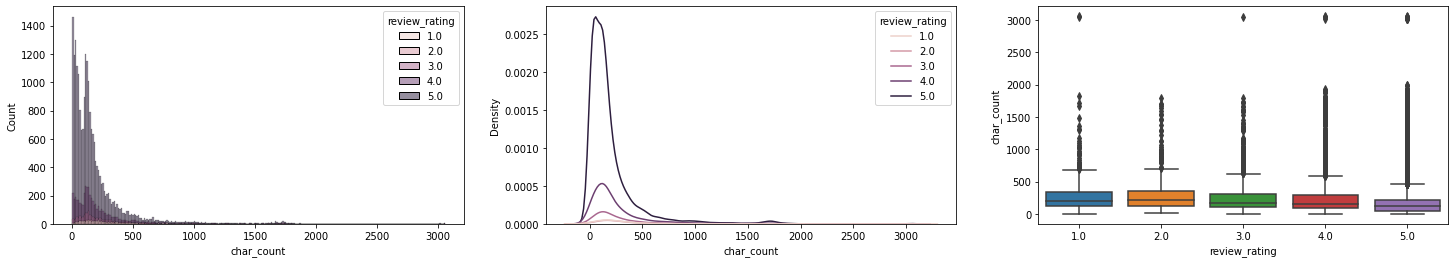

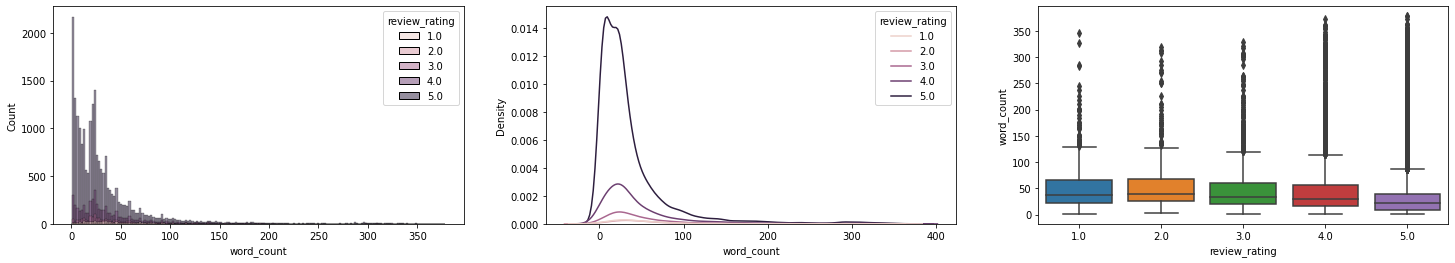

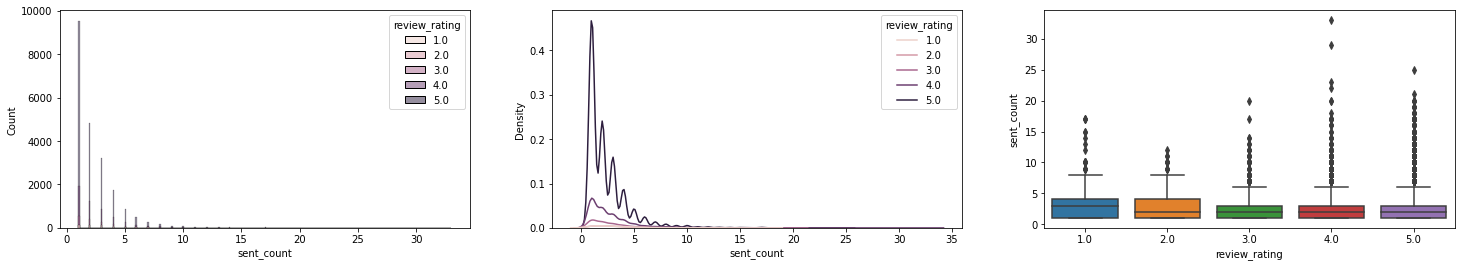

/Users/may/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


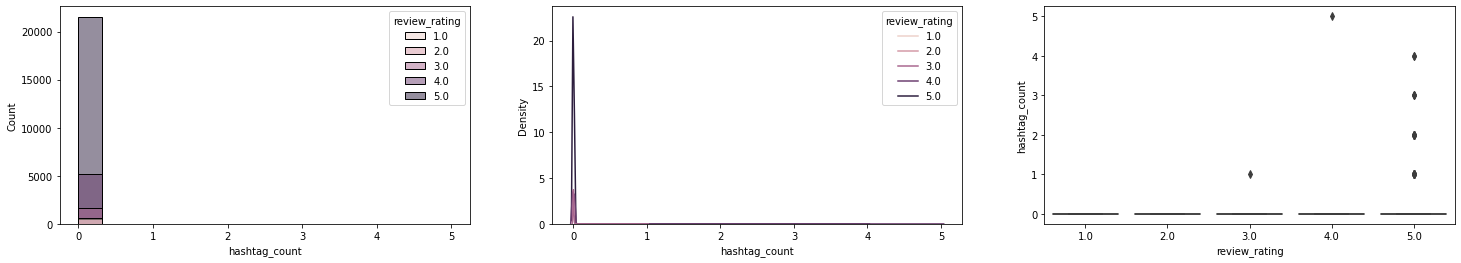

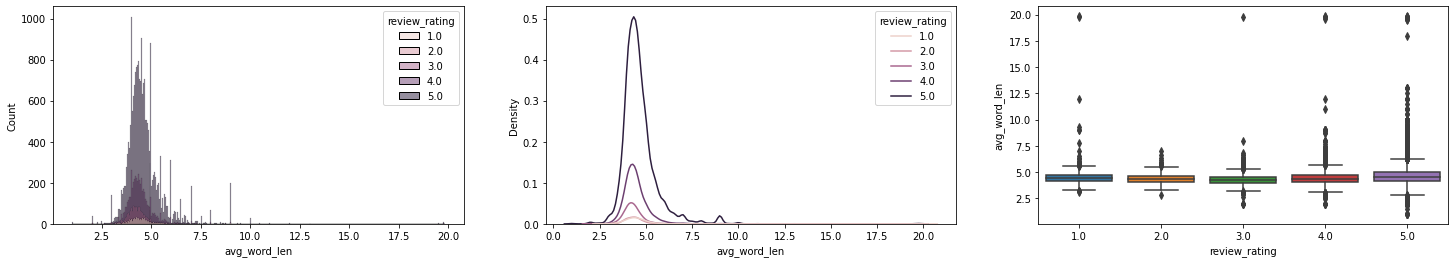

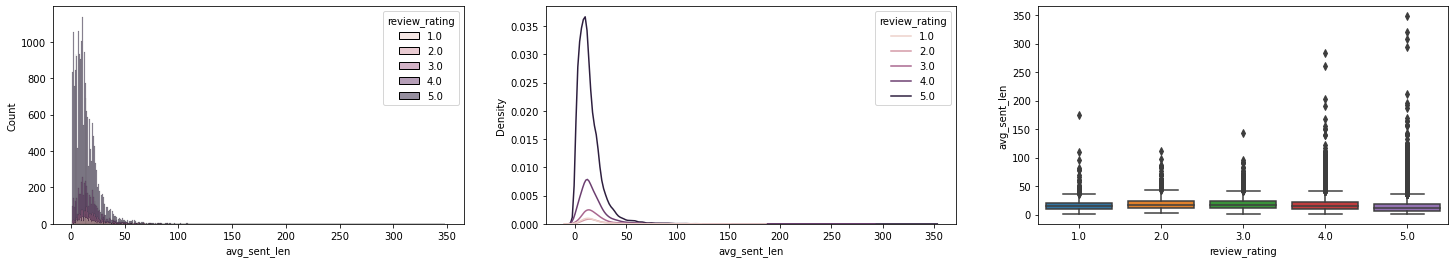

In [84]:
import seaborn as sns
for feature in ['char_count', 'word_count', 'sent_count', 'hashtag_count', 'avg_word_len', 'avg_sent_len']:
    fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(25,4))
    # Histogram
    sns.histplot(ax=ax[0], data = df_review, x = feature, hue = 'review_rating')
    # KDE plot
    sns.kdeplot(ax=ax[1], data = df_review, x = feature, hue = 'review_rating')
    # Boxplot
    sns.boxplot(ax=ax[2], data = df_review, x = 'review_rating', y = feature)
    plt.show()

### clean text

In [85]:
import re
import string
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    # Remove non-Roman characters
    text = re.sub("([^\x00-\x7F])+", " ", text)
    
    return text
df_review["review_clean"] = df_review["review_content"].map(lambda x: clean_text(x))

In [86]:
df_review[['review_content','review_clean']].head()

,review_content,review_clean
0,Part of the magic for me growing up as a boy w...,part of the magic for me growing up as a boy w...
1,"Amazing detail, every credit to the photograph...",amazing detail every credit to the photographe...
2,This was purchased on behalf of my Dad. He is ...,this was purchased on behalf of my dad he is a...
3,Everything I really needed to see what was on ...,everything i really needed to see what was on ...
4,I collect them all as the glossy pictures are ...,i collect them all as the glossy pictures are ...


In [87]:
df_review_1 = df_review[df_review.review_rating==1]
df_review_2 = df_review[df_review.review_rating==2]
df_review_3 = df_review[df_review.review_rating==3]
df_review_4 = df_review[df_review.review_rating==4]
df_review_5 = df_review[df_review.review_rating==5]

In [88]:
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))
corpus = [word for i in df_review["review_clean"].str.split().values.tolist() for word in i if (word not in stop)]
corpus_1 = [word for i in df_review[df_review.review_rating==1]["review_clean"].str.split().values.tolist() for word in i if (word not in stop)]
corpus_5 = [word for i in df_review[df_review.review_rating==5]["review_clean"].str.split().values.tolist() for word in i if (word not in stop)]

In [89]:
from nltk.probability import FreqDist
most_common = FreqDist(corpus).most_common(10)
most_common_1 = FreqDist(corpus_1).most_common(10)
most_common_5 = FreqDist(corpus_5).most_common(10)

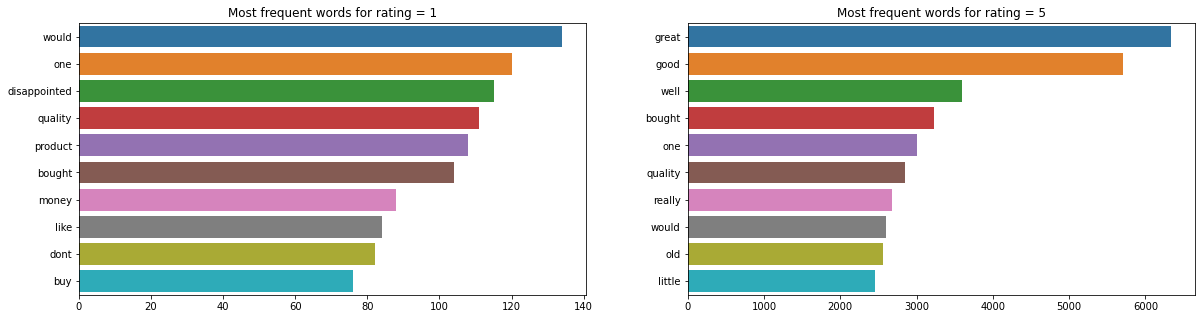

In [90]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,5))
words, frequency = [], []
for word, count in most_common_1:
    words.append(word)
    frequency.append(count)
    
sns.barplot(ax=ax[0], x = frequency, y = words)
ax[0].title.set_text('Most frequent words for rating = 1')
# plt.show()

words, frequency = [], []
for word, count in most_common_5:
    words.append(word)
    frequency.append(count)
    
sns.barplot(ax=ax[1], x = frequency, y = words)
ax[1].title.set_text('Most frequent words for rating = 5')
plt.show()

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize CountVectorizer
vec = CountVectorizer(stop_words = stop, ngram_range = (2, 3))
# Matrix of ngrams
bow_1 = vec.fit_transform(df_review_1["review_clean"])
# Count frequency of ngrams
count_values_1 = bow_1.toarray().sum(axis=0)
# Create DataFrame from ngram frequencies
ngram_freq_1 = pd.DataFrame(sorted([(count_values_1[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
ngram_freq_1.columns = ["frequency", "ngram"]
ngram_freq_1

,frequency,ngram
0,38,year old
1,37,waste money
2,32,poor quality
3,21,would recommend
4,12,worth money
...,...,...
26535,1,10 advertised
26536,1,03 megapixel simply
26537,1,03 megapixel
26538,1,015 mins


In [94]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize CountVectorizer
vec = CountVectorizer(stop_words = stop, ngram_range = (2, 2))
# Matrix of ngrams
bow_1 = vec.fit_transform(df_review_1["review_clean"])
# Count frequency of ngrams
count_values_1 = bow_1.toarray().sum(axis=0)
# Create DataFrame from ngram frequencies
ngram_freq_1 = pd.DataFrame(sorted([(count_values_1[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
ngram_freq_1.columns = ["frequency", "ngram"]

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize CountVectorizer
vec = CountVectorizer(stop_words = stop, ngram_range = (2, 2))
# Matrix of ngrams
bow_5 = vec.fit_transform(df_review_5["review_clean"])
# Count frequency of ngrams
count_values_5 = bow_5.toarray().sum(axis=0)
# Create DataFrame from ngram frequencies
ngram_freq_5 = pd.DataFrame(sorted([(count_values_5[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
ngram_freq_5.columns = ["frequency", "ngram"]

,frequency,ngram
0,1670,year old
1,1060,good quality
2,906,well made
3,610,value money
4,602,would recommend
...,...,...
233071,1,000 road
233072,1,00 wargaming
233073,1,00 track
233074,1,00 scale
